In [1]:
import pandas as pd
import os
import numpy as np
from keras.models import Model,load_model
import time

Using TensorFlow backend.


In [2]:
# VGG16 bootleneck model
modelVGG = load_model('./VGGbotleneck.h5')
featureNameVGG = 'fc1'
bottleVGG = Model(modelVGG.input,modelVGG.get_layer(featureNameVGG).output)
# DenseNet Model bottleneck
bottleDenseNet = load_model('./DenseNetbottleneck.h5')
# InceptionNet Model bottleneck
bottleInception = load_model('./Inceptionbottleneck.h5')

C:\Users\Asus\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [15]:
path1 = '../labelledOwnDataSet/taze/'
trainImg = os.listdir(path1)
path2 = '../labelledOwnDataSet/curuk/'
trainImg2 = os.listdir(path2)

In [6]:
bottleInception.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [4]:
# extract bottleNeck Feature Given İmage
# extract VGG feature
def ExtractVGGFeature(img):
  Timg = []
  Timg.append(img)
  Timg = np.array(Timg)
  return bottleVGG.predict(Timg)[0]
def ExtractInceptionFeature(img):
  img = cv2.resize(img,(299,299))
  Timg = []
  Timg.append(img)
  Timg = np.array(Timg)
  return bottleInception.predict(Timg)[0]
def extractDenseNetFeature(img):
  Timg = []
  Timg.append(img)
  Timg = np.array(Timg)
  return bottleDenseNet.predict(Timg)[0]

def combineFeature(img):
  extractV = ExtractVGGFeature(img)
  extractI = ExtractInceptionFeature(img)
  extractD = extractDenseNetFeature(img) 
  #print(type(extractV),len(extractV),extractV)
  return np.concatenate((extractV,extractD,extractI))                                

In [16]:
# load Test Data
import cv2
images = []
testLabels = []
print('Fresh apples is loading')
for img in trainImg:
    Timg = cv2.imread(path1+'/'+img)
    Timg = cv2.cvtColor(Timg, cv2.COLOR_BGR2RGB)
    Timg = cv2.resize(Timg,(224,224))
    #Timg = image.load_img(path1+'/'+img,target_size=(300, 300))
    
    print(type(Timg))
    images.append(Timg)
    #print(img)
    testLabels.append(1)
print('Fresh apples is done')    
print('Rotten apples is loading')
for img in trainImg2:
    #Timg = image.load_img(path2+'/'+img,target_size=(300, 300))
    Timg = cv2.imread(path2+'/'+img)
    Timg = cv2.cvtColor(Timg, cv2.COLOR_BGR2RGB)
    Timg = cv2.resize(Timg,(224,224))
    images.append(Timg)
    testLabels.append(0)
    print(img)
print('Rotten apples is done')
"""import random
r = random.random()
random.shuffle(images,lambda : r)
random.shuffle(labels,lambda : r)"""

Fresh apples is loading
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

IMG_20190422_202343.jpg
IMG_20190422_202348.jpg
IMG_20190422_202403.jpg
IMG_20190422_202409.jpg
IMG_20190422_202415.jpg
IMG_20190422_202458.jpg
IMG_20190422_202459_1.jpg
IMG_20190422_202502.jpg
IMG_20190422_202506.jpg
IMG_20190422_202748.jpg
IMG_20190422_202750.jpg
IMG_20190422_202753.jpg
IMG_20190422_202804.jpg
IMG_20190422_202806.jpg
IMG_20190422_202809.jpg
IMG_20190422_202818.jpg
IMG_20190422_202820.jpg
IMG_20190422_202832.jpg
IMG_20190422_202844.jpg
IMG_20190422_202855.jpg
IMG_20190422_202904.jpg
IMG_20190422_202909.jpg
IMG_20190422_202915.jpg
IMG_20190422_202926.jpg
IMG_20190422_202931.jpg
IMG_20190422_202937.jpg
IMG_20190422_202951.jpg
IMG_20190422_202959.jpg
IMG_20190422_203002.jpg
IMG_20190422_203010.jpg
IMG_20190422_203013.jpg
IMG_20190422_203018.jpg
IMG_20190422_203030.jpg
IMG_20190422_203033.jpg
IMG_20190422_203041.jpg
IMG_20190422_203052.jpg
IMG_20190422_203058.jpg
IMG_20190422_203101.jpg
IMG_20190422_203108.jpg
IMG_20190422_203112.jpg
IMG_20190422_203124.jpg
IMG_20190422_2

'import random\nr = random.random()\nrandom.shuffle(images,lambda : r)\nrandom.shuffle(labels,lambda : r)'

In [26]:
# sample usage of combine feature
# arr = combineFeature(images[0])

<class 'numpy.ndarray'> 4096 [ 0.         0.        12.573207  ... 16.854876   2.5048618  4.737497 ]


In [5]:
DenseNetFeature = pd.read_csv('../feature/DenseNetFeatureNew.csv')
InceptionFeature = pd.read_csv('../feature/InceptionNewFeature.csv')
VGGFeature = pd.read_csv('../feature/VGG16FeatureNew.csv')
labels = DenseNetFeature['label']

FileNotFoundError: File b'../feature/DenseNetFeatureNew.csv' does not exist

In [4]:
# DATA Preprocessing
DenseNetFeature = DenseNetFeature.drop('label',axis=1)     # 1664 Feature
InceptionFeature = InceptionFeature.drop('label',axis=1)   # 2048 Feature
VGGFeature = VGGFeature.drop('label',axis=1)               # 4096 Feature
###########################################################
DenseNetFeature = DenseNetFeature.iloc[:,1:]
InceptionFeature = InceptionFeature.iloc[:,1:] 
VGGFeature = VGGFeature.iloc[:,1:]

NameError: name 'DenseNetFeature' is not defined

In [9]:
allFeature = pd.concat([VGGFeature,DenseNetFeature,InceptionFeature],axis=1)

In [10]:
allFeature.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.443204,0.0,4.485566,9.603477,0.0,0.0,0.0,0.000000,0.0,11.236294,...,12.856219,0.085921,0.000000,7.331750,4.777709,0.617774,79.701675,0.000000,0.000000,0.000000
1,3.572220,0.0,0.000000,4.485280,0.0,0.0,0.0,1.633830,0.0,12.618198,...,29.921345,3.699864,1.759400,3.413769,3.779988,0.000000,92.154490,0.239925,1.938532,1.185839
2,0.000000,0.0,0.000000,4.137541,0.0,0.0,0.0,5.983532,0.0,15.215549,...,12.558860,1.045674,0.188371,8.815018,2.188584,2.882365,88.225950,1.759497,3.615513,0.045838
3,0.000000,0.0,2.172528,9.233212,0.0,0.0,0.0,3.457694,0.0,15.921820,...,28.189090,0.182033,2.879657,3.935045,7.761560,0.251999,129.760180,1.611363,0.000000,0.000000
4,0.000000,0.0,0.000000,2.064098,0.0,0.0,0.0,2.579127,0.0,13.699089,...,17.930922,3.296776,1.080030,9.781387,0.345364,0.000000,116.014380,0.000000,0.000000,0.000000


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
"""KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X = allFeature,y = labels)
RF = RandomForestClassifier(n_estimators=300)
RF.fit(allFeature,labels)"""
SVM = SVC(kernel='linear')
SVM.fit(allFeature,labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
i = 0
predictLabel = []
for picture in images:
  TT = []
  sec1 = time.time()
  TT.append(combineFeature(picture))
  pred = SVM.predict(TT)[0]
  sec2 = time.time()
  i += 1
  print(i)
  print("time",abs(sec2-sec1))
  predictLabel.append(pred)

1
time 3.7330381870269775
2
time 3.6589572429656982
3
time 3.6460001468658447
4
time 3.6479992866516113
5
time 3.65199875831604
6
time 3.965001106262207
7
time 4.046000003814697
8
time 5.011005163192749
9
time 4.5850989818573
10
time 4.9110002517700195
11
time 4.914525032043457
12
time 4.381519794464111
13
time 4.142996549606323
14
time 4.039992809295654
15
time 4.896002769470215
16
time 4.935637712478638
17
time 4.844099998474121
18
time 4.280999422073364
19
time 4.017001628875732
20
time 4.099256992340088
21
time 4.122997283935547
22
time 4.890002250671387
23
time 4.615005254745483
24
time 4.413588285446167
25
time 4.618000268936157
26
time 4.902062654495239
27
time 4.820996999740601
28
time 4.51199746131897
29
time 4.9850053787231445
30
time 5.170062065124512
31
time 4.808002948760986
32
time 4.917996883392334
33
time 4.640002489089966
34
time 4.098994970321655
35
time 4.17500114440918
36
time 4.838050603866577
37
time 4.178999662399292
38
time 4.050999402999878
39
time 4.3466372489

308
time 4.821153879165649
309
time 4.822066068649292
310
time 4.931019306182861
311
time 4.739608526229858
312
time 4.754008054733276
313
time 4.756803750991821
314
time 4.700697898864746
315
time 4.625002384185791
316
time 4.80724835395813
317
time 5.040842294692993
318
time 4.962134122848511
319
time 5.063351392745972
320
time 4.6409971714019775
321
time 5.330107688903809
322
time 5.256102085113525
323
time 5.146087884902954
324
time 5.34265661239624
325
time 4.6765196323394775
326
time 4.761982202529907
327
time 4.702564477920532
328
time 4.668993949890137
329
time 4.594994306564331
330
time 4.7755913734436035
331
time 4.700571537017822
332
time 4.732118606567383
333
time 5.075165510177612
334
time 4.882305145263672
335
time 4.788185358047485
336
time 4.634000062942505
337
time 5.053587913513184
338
time 4.326563835144043
339
time 4.705523490905762
340
time 4.857733249664307
341
time 4.96536922454834
342
time 4.786682605743408
343
time 4.7945873737335205
344
time 4.732054710388184


609
time 3.6930007934570312
610
time 3.6769979000091553
611
time 3.617999315261841
612
time 3.6390013694763184
613
time 3.7640035152435303
614
time 3.6779966354370117
615
time 3.727999687194824
616
time 3.6830008029937744
617
time 3.7090015411376953
618
time 3.671998977661133
619
time 3.6599984169006348
620
time 3.6999971866607666
621
time 3.646005153656006
622
time 3.6899964809417725
623
time 3.681999444961548
624
time 3.7210023403167725
625
time 3.664003372192383
626
time 3.6560027599334717
627
time 3.625999927520752
628
time 3.6579952239990234
629
time 3.645000696182251
630
time 3.6419920921325684
631
time 3.635998010635376
632
time 3.622001886367798
633
time 3.654000997543335
634
time 3.6039884090423584
635
time 3.6050000190734863
636
time 3.619985818862915
637
time 3.9219987392425537
638
time 3.624999523162842
639
time 3.615997314453125
640
time 3.6330008506774902
641
time 3.628000259399414
642
time 3.6260037422180176
643
time 3.6049938201904297
644
time 3.6349995136260986
645
tim

In [18]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(testLabels,predictLabel)

In [19]:
cf

array([[116,  16],
       [377, 217]])

In [30]:
TT = []
sec1 = time.time()
TT.append(combineFeature(images[99]))
pred = SVM.predict(TT)[0]
sec2 = time.time()
print("time",abs(sec2-sec1))

time 3.8279716968536377


In [0]:
# K=5 accuracy 98,59
# K=3 accuracy 98,95
# RandomForest 10 estimator accuracy 98,09
# RandomForest 5 estimator accuracy 96,99
# RandomForest 50 estimator accuracy 98,96
# RandomForest 100 estimator accuracy 98,89
# RandomForest 150 estimator accuracy 98,59
# RandomForest 200 estimator accuracy 98,99
# RandomForest 250 estimator accuracy 98,89
# RandomForest 250 estimator accuracy 98,79
# SVM rbf kernel 61,96
# SVM poly kernel 99,79
# SVM Linear kernel 99,79

# TRY OWN IMAGE

In [17]:
import cv2
from matplotlib import pyplot as plt
path1 = '../owndataset/'
ownImage = os.listdir(path1)
images = []
for img in ownImage:
    Timg = cv2.imread(path1+'/'+img)
    Timg = cv2.cvtColor(Timg, cv2.COLOR_BGR2RGB)
    Timg = cv2.resize(Timg,(224,224))
    #Timg = image.load_img(path1+'/'+img,target_size=(300, 300))
    
    print(img)
    images.append(Timg)

IMG_20190421_153118.jpg
IMG_20190421_153445.jpg
IMG_20190421_153552.jpg
IMG_20190421_153634.jpg
IMG_20190421_153650.jpg
IMG_20190421_153703.jpg
IMG_20190421_153711.jpg
IMG_20190421_153721.jpg
IMG_20190421_153732.jpg
IMG_20190421_153741.jpg
IMG_20190421_153747.jpg


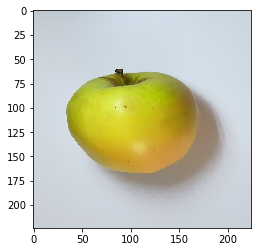

4.052994251251221
result:  0


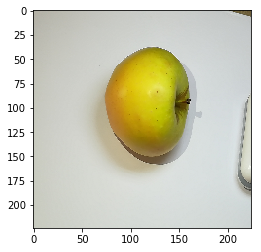

4.061997175216675
result:  0


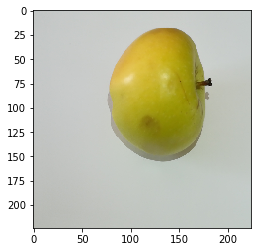

4.050995588302612
result:  1


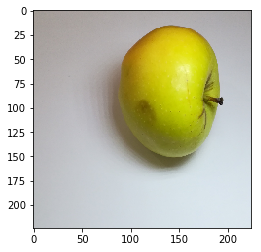

4.060993194580078
result:  1


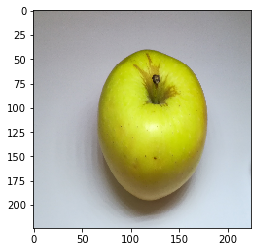

4.074001789093018
result:  0


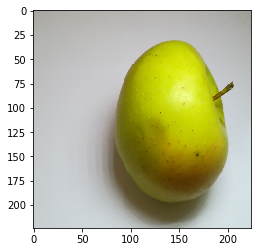

4.089007616043091
result:  1


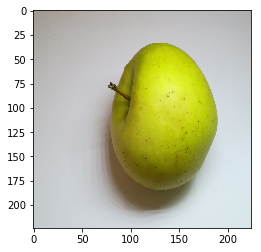

4.082993745803833
result:  0


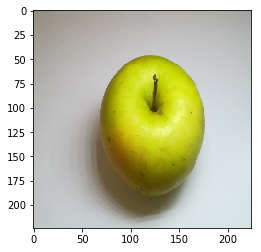

4.320001602172852
result:  0


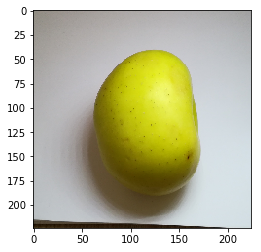

4.038001537322998
result:  1


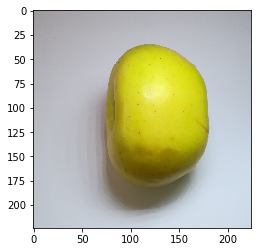

4.288001775741577
result:  1


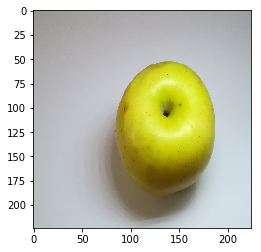

4.584000825881958
result:  1


In [18]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2

for img in images:
  TT = []
  sec1 = time.time()
  TT.append(combineFeature(img))
  plt.imshow(img)
  plt.show()
  pred = SVM.predict(TT)[0]
  sec2 = time.time()
  print(abs(sec2-sec1))  
  print('result: ',pred)  